## 0. MNIST data (*)

In the whole exercise, we will work with the famous MNIST dataset. Start by installing ```tensorflow``` to your pipenv if you haven't already. Import ```keras``` from tensorflow and load the dataset using ```keras.mnist.load_data()```.

&nbsp; a) Check help() on ```keras.datasets.mnist.load_data``` and read to find out how to unpack the data properly. 

&nbsp; b) Check the shapes of X_train, X_test, y_train, y_test. What does each dimension mean?

&nbsp; c) How many images are there in X_train?

&nbsp; d) Check smallest and largest value of a sample image of your choice. What do these numbers in the matrix represent? Plot this image using ```plt.imshow()``` and set cmap to "gray" to get the correct representation of the grayscale image.

&nbsp; e) Plot 20 sample images. 

&nbsp; f) When you checked the shapes of the data you noticed that X_train, X_test are 3D tensors (generalization of a matrix to more dimensions). However KNN classifier in scikit-learn requires a 2D tensor or a matrix. Reshape X_train and X_test to appropriate shapes. 

<details>

<summary>Hint</summary>

e) A vector or a 1D array can represent one image. 

</details>

<details>

<summary>Answer</summary>

d) 0 and 255. It's grayscale images of 28x28 pixels, where the higher the value, the larger pixel intensity.

<img src = "../assets/MNIST_samples.png" height=100>

e) Shape: X_train: (60000, 784), X_test: (10000, 784)

</details>

---

In [78]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# b) number of images, pixels in x, pixels in y
# c) 60000
# d) 0-255, how much white there is in an image.

x_train[19].max(), y_train[:5]

(255, array([5, 0, 4, 1, 9], dtype=uint8))

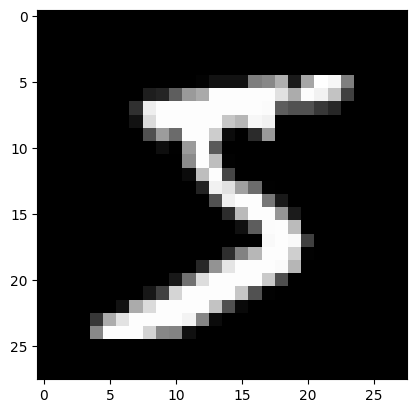

In [79]:
# d)
plt.imshow(x_train[0], cmap="gray")

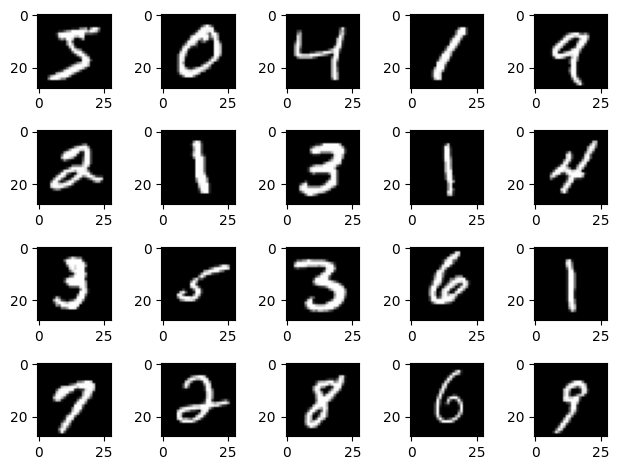

In [80]:
# 05-01 e)
fig, ax = plt.subplots(4, 5, tight_layout=True)
for i in range(20):
    ax.flat[i].imshow(x_train[i], cmap="gray")
    


In [81]:
x = np.array([[[1,2], [3,4]], [[5, 6], [7, 8]]])
y = x.reshape(2, -1)
x.shape, y.shape
y, x


(array([[1, 2, 3, 4],
        [5, 6, 7, 8]]),
 array([[[1, 2],
         [3, 4]],
 
        [[5, 6],
         [7, 8]]]))

In [82]:
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## 1. Train|test|validation split (*)

As you already have training data and testing data, do a split on the training data to get validation data. The validation data will be used for tuning $k$ number of neighbors for KNN. I used 0.16 for validation as it is close to 1/6 to get around 10000 validation samples.

---

In [83]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.16666, random_state=42) 
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((50000, 784), (10000, 784), (50000,), (10000,))